In [1]:
import pandas as pd
df_cd4 = pd.read_csv('output_CD4.csv',index_col=0)
df_cd8 = pd.read_csv('output_CD8.csv',index_col=0)
df_cd8

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g
P1.tr.1.AAACCTGGTGATGCCC-1,0.229220,0.070671,-0.088936,0.045396,0.246643,1.503139,0.081098
P1.tr.1.AAACGGGTCATACGGT-1,0.328672,0.204518,0.088267,0.261208,0.701314,1.498233,0.043431
P1.tr.1.AAAGATGGTCGGCACT-1,0.424730,0.246822,0.075818,0.364435,0.478061,2.523060,0.303484
P1.tr.1.AAAGCAACAACGCACC-1,0.272637,0.141539,-0.094156,0.222710,0.377908,1.992797,0.125190
P1.tr.1.AAATGCCTCCGCAAGC-1,0.262455,0.076544,0.048752,0.082026,0.431669,1.632381,0.260095
...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,0.403082,0.182099,-0.001340,0.347046,0.563435,1.450641,0.122231
P9.ut.TTGGCAATCAGCTTAG-1,0.292876,0.079683,-0.009155,0.182049,0.580056,1.254059,0.240237
P9.ut.TTTATGCGTGGCAAAC-1,0.366441,0.207521,0.036062,0.409483,0.584811,1.515891,0.052026
P9.ut.TTTGGTTTCCTCAACC-1,0.341509,0.201506,0.087572,0.365407,0.665723,1.723769,0.244581


In [2]:
metadata = pd.read_csv("GSE179994_Tcell.metadata.tsv.gz", sep="\t", compression="gzip")
t_cell_types = ['CD4','CD8']
metadata = metadata[metadata["celltype"].isin(t_cell_types)]
metadata = metadata.set_index('cellid')
df_cd8 = df_cd8.join(metadata)
df_cd4 = df_cd4.join(metadata)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8Lowery_pos_243g", 
    "CD8Oliveira_TTE_100g", 
    "CD8Oliveira_pos_74g", 
    "CD8Yost_CD8_Exh_100g", 
    "ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    #"CD8Lowery_neg_99g",
    "ave_Hanada_neg_5g", 
    "ave_Oliveira_virus_26g"
]

pos_sigs_CD4 = [
    "Hanada_pos_9g", 
    "CD4Caushi_Tfh2_66g", 
    #"CD4Jansen_TermDiff_73g", 
    "CD4Lowery_pos_40g", 
    "CD4Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4Lowery_neg_37g", 
    "Hanada_neg_4g"
]

def classify_cells(df, cell_type, pos_sigs, neg_sigs):
    sub = df[df["celltype"] == cell_type].copy()
    cols = pos_sigs + neg_sigs

    # z‐score the signatures _within_ this subset
    sub[cols] = sub[cols].apply(zscore)

    # compute mean “pos” and “neg” scores
    sub[f"pos_score_{cell_type}"] = sub[pos_sigs].mean(axis=1)
    sub[f"neg_score_{cell_type}"] = sub[neg_sigs].mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = sub[f"pos_score_{cell_type}"].median()
    neg_cut = sub[f"neg_score_{cell_type}"].median()

    # classify per cell
    sub[f"cancer_reactive_per_cell_{cell_type}"] = (
        (sub[f"pos_score_{cell_type}"] >  pos_cut) &
        (sub[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return sub, pos_cut, neg_cut

# run it for each cell‐type
cd8_called,pos_cut_CD8, neg_cut_CD8= classify_cells(df_cd8, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called,pos_cut_CD4, neg_cut_CD4 = classify_cells(df_cd4, "CD4", pos_sigs_CD4, neg_sigs_CD4)
cd8_called

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,patient,sample,celltype,cluster,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
P1.tr.1.AAACCTGGTGATGCCC-1,-0.774165,-0.860701,-1.073492,-1.281915,-1.448275,-0.355776,-0.792644,P1,P1.post.1,CD8,Non-exhausted,-1.087710,-0.574210,False
P1.tr.1.AAACGGGTCATACGGT-1,0.280017,0.368966,0.291831,0.244646,0.951377,-0.370740,-1.191787,P1,P1.post.1,CD8,Non-exhausted,0.427367,-0.781264,True
P1.tr.1.AAAGATGGTCGGCACT-1,1.298236,0.757614,0.195913,0.974827,-0.226900,2.754946,1.563910,P1,P1.post.1,CD8,Non-exhausted,0.599938,2.159428,False
P1.tr.1.AAAGCAACAACGCACC-1,-0.313947,-0.209628,-1.113711,-0.027674,-0.755485,1.137661,-0.325417,P1,P1.post.1,CD8,Non-exhausted,-0.484089,0.406122,False
P1.tr.1.AAATGCCTCCGCAAGC-1,-0.421878,-0.806750,-0.012623,-1.022812,-0.471747,0.038407,1.104124,P1,P1.post.1,CD8,Non-exhausted,-0.547162,0.571265,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,1.068764,0.162999,-0.398581,0.851823,0.223684,-0.515892,-0.356765,P9,P9.pre,CD8,Tex,0.381738,-0.436329,True
P9.ut.TTGGCAATCAGCTTAG-1,-0.099419,-0.777911,-0.458793,-0.315291,0.311408,-1.115460,0.893695,P9,P9.pre,CD8,Non-exhausted,-0.268001,-0.110883,False
P9.ut.TTTATGCGTGGCAAAC-1,0.680368,0.396558,-0.110398,1.293478,0.336503,-0.316883,-1.100712,P9,P9.pre,CD8,Tex,0.519302,-0.708797,True
P9.ut.TTTGGTTTCCTCAACC-1,0.416092,0.341296,0.286477,0.981698,0.763540,0.317138,0.939725,P9,P9.pre,CD8,Tex,0.557821,0.628431,False


In [4]:
df_combined = pd.concat([cd4_called, cd8_called],
                     axis=0,          # stack rows
                     ignore_index=False,
                     sort=False)
df_combined

/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CD4Caushi_Tfh2_66g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,patient,sample,celltype,cluster,...,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
P1.tr.1.AAACCTGCACATGACT-1,1.099481,0.121191,0.408590,0.324094,-0.200751,0.350250,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAACCTGCAGATCGGA-1,1.290213,-1.294920,1.707726,0.346779,0.856908,-1.973919,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAACCTGCAGATGGGT-1,1.069978,0.453567,1.459626,1.147229,0.132172,-0.580983,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAACCTGGTCGGATCC-1,0.408382,-0.125943,-0.310344,-0.731053,1.161202,-1.719891,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAACCTGGTTAAGATG-1,-0.609432,0.596894,-0.385071,-0.729231,-0.777021,-1.979572,P1,P1.post.1,CD4,CD4_C4-CD69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Tex,...,1.068764,0.162999,-0.398581,0.851823,0.223684,-0.515892,-0.356765,0.381738,-0.436329,True
P9.ut.TTGGCAATCAGCTTAG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Non-exhausted,...,-0.099419,-0.777911,-0.458793,-0.315291,0.311408,-1.115460,0.893695,-0.268001,-0.110883,False
P9.ut.TTTATGCGTGGCAAAC-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Tex,...,0.680368,0.396558,-0.110398,1.293478,0.336503,-0.316883,-1.100712,0.519302,-0.708797,True
P9.ut.TTTGGTTTCCTCAACC-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Tex,...,0.416092,0.341296,0.286477,0.981698,0.763540,0.317138,0.939725,0.557821,0.628431,False


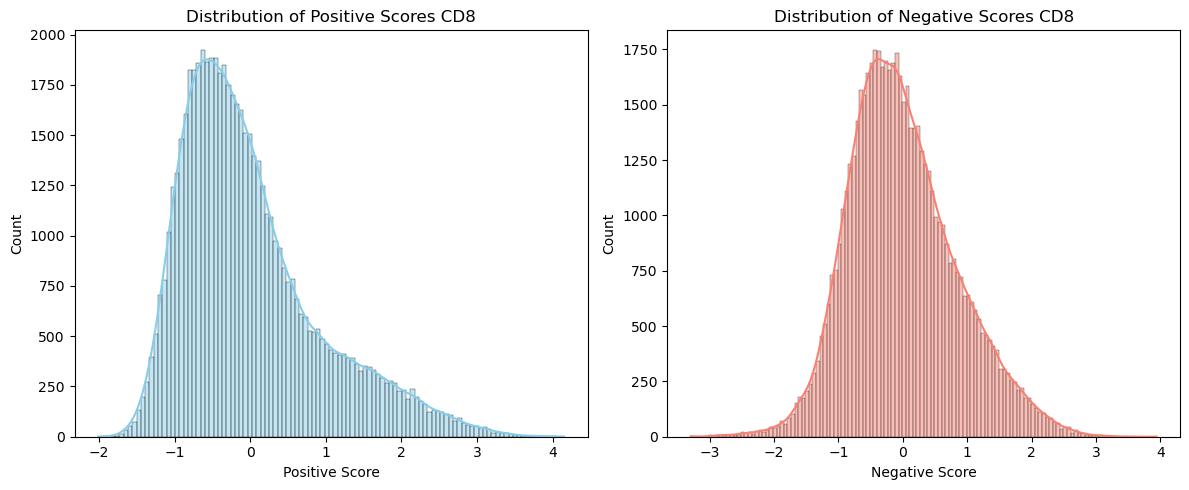

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cd8_called['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd8_called['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

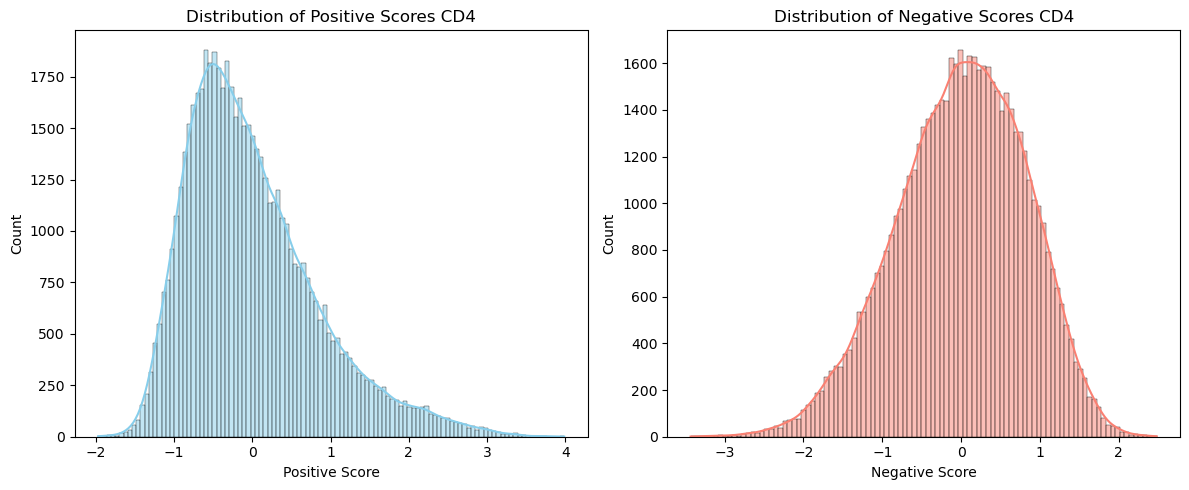

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cd4_called['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd4_called['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

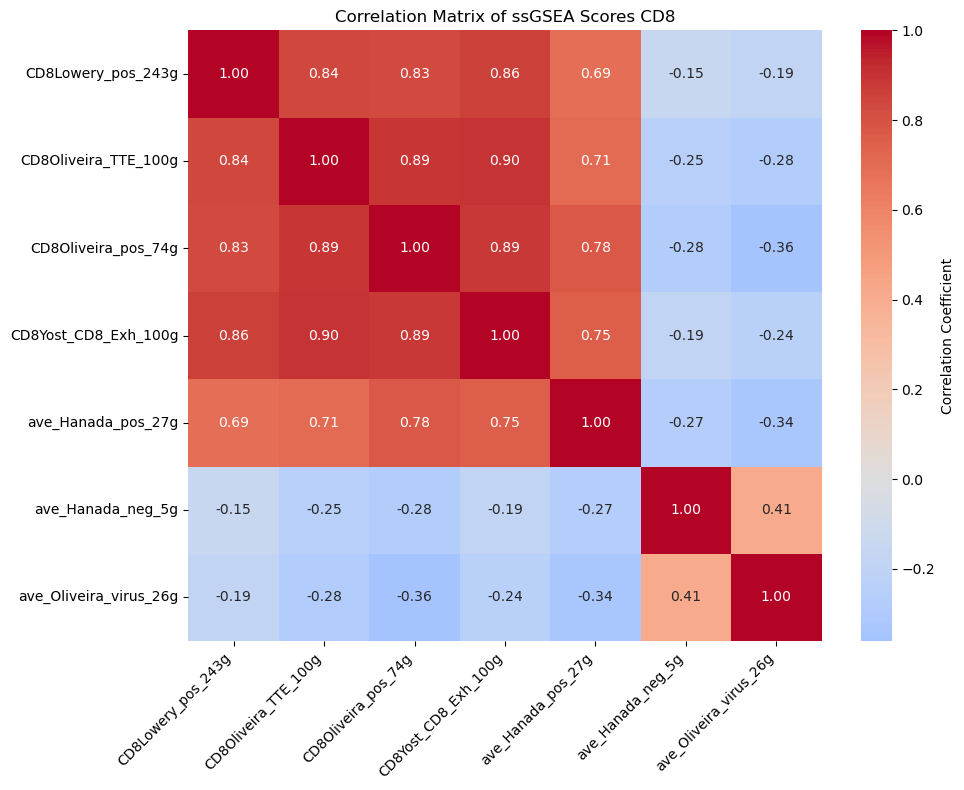

In [7]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd8_called[all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

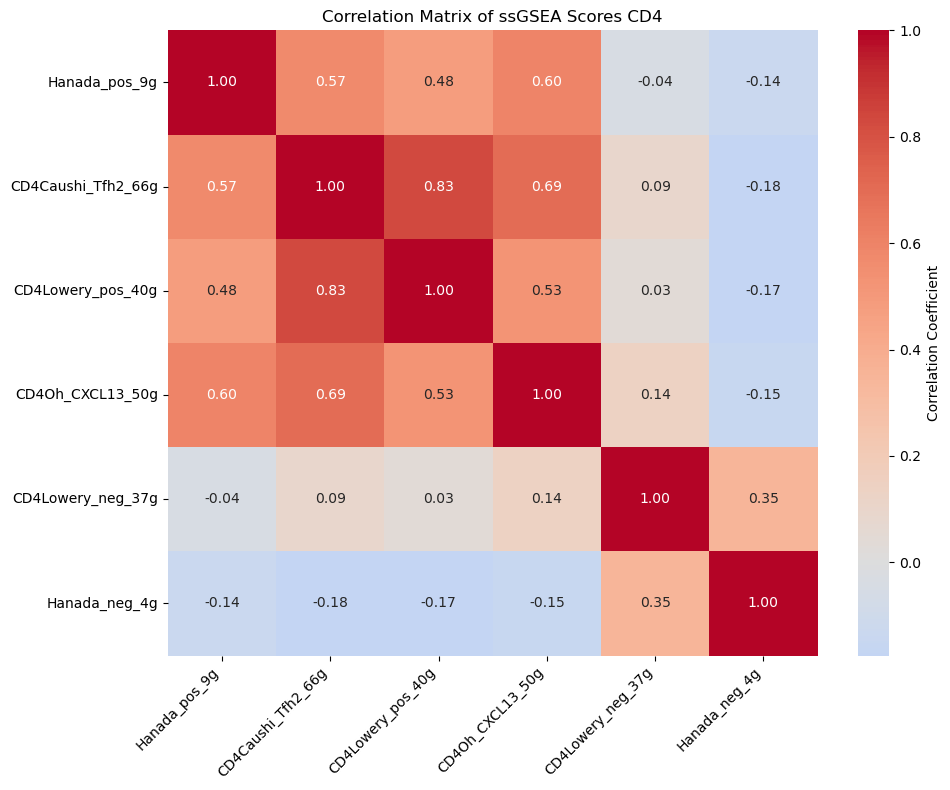

In [8]:
# Combine the lists to get all columns
all_sigs_CD4 = pos_sigs_CD4 + neg_sigs_CD4

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd4_called[all_sigs_CD4].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD4")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clustering based on signature genes

In [9]:
import pickle
with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

del sigs_CD4['Jansen_TermDiff_73g']
del sigs_CD8['Lowery_neg_99g']

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [10]:
import scanpy as sc
import numpy as np

# Load the sparse matrix
adata = sc.read_mtx("GSE179994_all.Tcell.rawCounts.mtx")

adata.obs_names = [line.strip() for line in open("barcodes.txt")]
adata.var_names = [line.strip() for line in open("features.txt")]   
metadata_df = pd.read_csv("GSE179994_Tcell.metadata.tsv.gz", sep="\t", compression="gzip")

metadata_df = metadata_df.set_index('cellid')

adata.obs.index.name = 'cellid'

adata.obs = adata.obs.join(metadata_df, how='left')

t_cell_types = [
'CD4',
'CD8'
]
adata = adata[adata.obs["celltype"].isin(t_cell_types)]


In [11]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))

In [12]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata.var.index):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata.var.index):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 156/164 CD4 genes are found.
 386/396 CD8 genes are found.


/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10

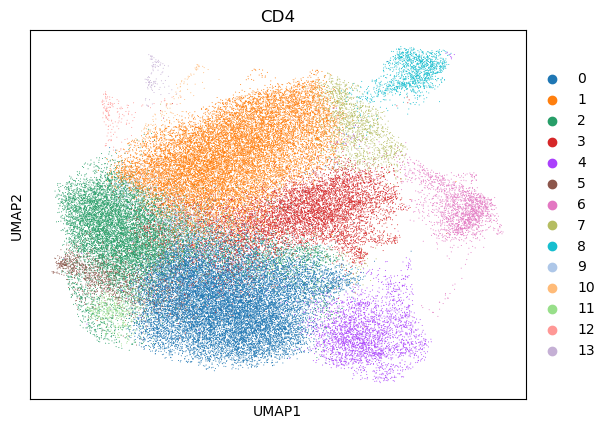

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


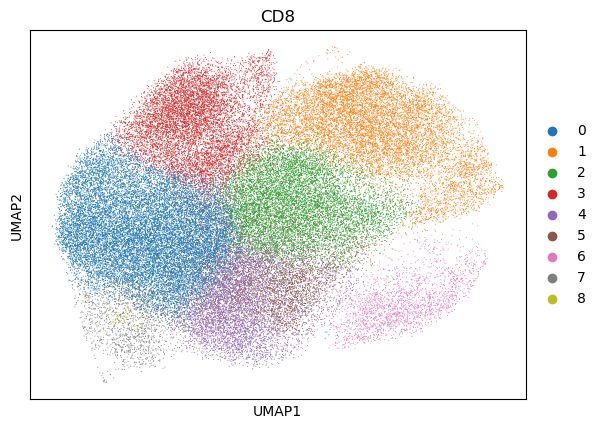

In [13]:
%matplotlib inline
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs["leiden"].rename(f"cluster_{key}")

cd4_mask = adata.obs["celltype"]=='CD4'
cd8_mask = adata.obs["celltype"]=='CD8'

leiden_cd4 = run_cluster(adata[cd4_mask, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata[cd8_mask, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], axis=1)


In [14]:
merged_df = df_combined.join(clusters_wide[['cluster_CD4','cluster_CD8']])

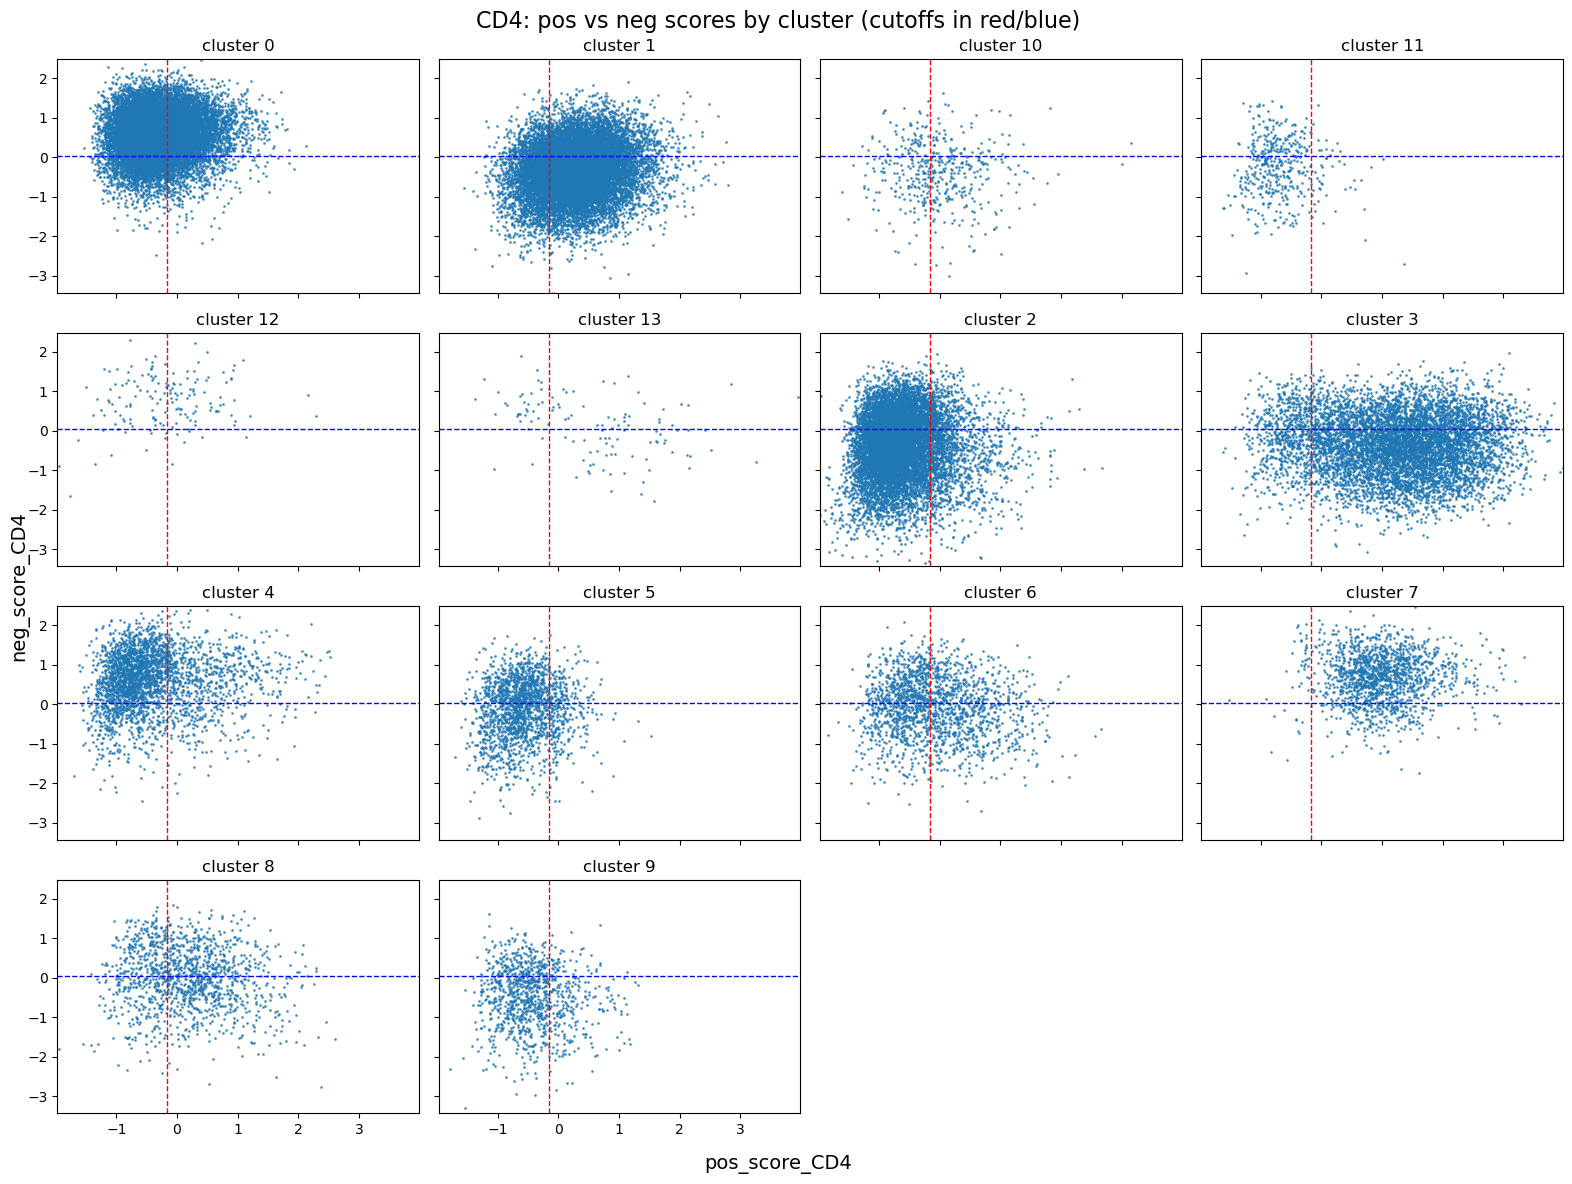

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = [c for c in merged_df['cluster_CD4'].unique() if pd.notna(c)]
clusters = sorted(clusters)

# global axis limits
xmin, xmax = merged_df['pos_score_CD4'].min(), merged_df['pos_score_CD4'].max()
ymin, ymax = merged_df['neg_score_CD4'].min(), merged_df['neg_score_CD4'].max()

# layout
n = len(clusters)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 3*nrows),
    sharex=True, sharey=True
)

for ax, clu in zip(axes.flat, clusters):
    sub = merged_df[merged_df['cluster_CD4'] == clu]
    
    # scatter
    ax.scatter(
        sub['pos_score_CD4'],
        sub['neg_score_CD4'],
        s=1,
        alpha=0.7
    )
    
    # means
    # mean_x = sub['pos_score_CD4'].mean()
    # mean_y = sub['neg_score_CD4'].mean()
    
    # # vertical & horizontal lines
    # ax.axvline(mean_x, color='red', linestyle='--', linewidth=1)
    # ax.axhline(mean_y, color='blue', linestyle='--', linewidth=1)

    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# turn off any unused subplots
for ax in axes.flat[n:]:
    ax.axis('off')

# global labels & title
fig.supxlabel('pos_score_CD4', fontsize=14)
fig.supylabel('neg_score_CD4', fontsize=14)
fig.suptitle('CD4: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

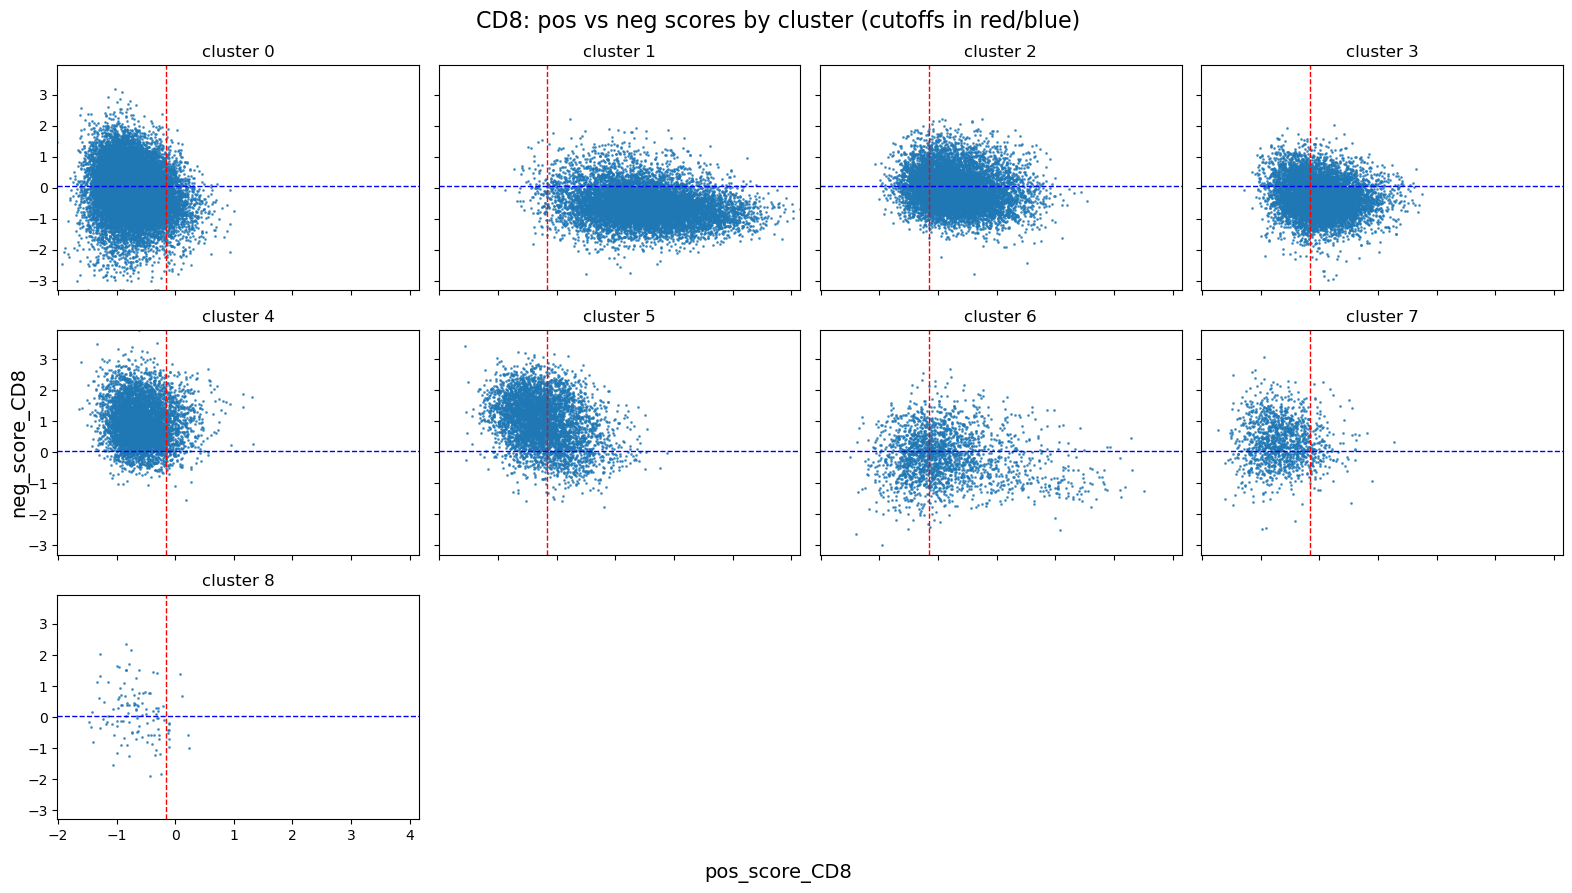

In [16]:
clusters_cd8 = [c for c in merged_df['cluster_CD8'].unique() if pd.notna(c)]
clusters_cd8 = sorted(clusters_cd8)

# compute global axis limits for CD8
xmin8, xmax8 = merged_df['pos_score_CD8'].min(), merged_df['pos_score_CD8'].max()
ymin8, ymax8 = merged_df['neg_score_CD8'].min(), merged_df['neg_score_CD8'].max()

# layout: 4 columns, as many rows as needed
n8 = len(clusters_cd8)
ncols8 = 4
nrows8 = int(np.ceil(n8 / ncols8))

fig8, axes8 = plt.subplots(
    nrows8, ncols8,
    figsize=(4*ncols8, 3*nrows8),
    sharex=True, sharey=True
)

for ax, clu in zip(axes8.flat, clusters_cd8):
    sub8 = merged_df[merged_df['cluster_CD8'] == clu]
    
    # scatter
    ax.scatter(
        sub8['pos_score_CD8'],
        sub8['neg_score_CD8'],
        s=1,
        alpha=0.7
    )
    
    # cluster means
    # mean_x8 = sub8['pos_score_CD8'].mean()
    # mean_y8 = sub8['neg_score_CD8'].mean()
    
    # # draw mean lines
    # ax.axvline(mean_x8, color='red', linestyle='--', linewidth=1)
    # ax.axhline(mean_y8, color='blue', linestyle='--', linewidth=1)
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin8, xmax8)
    ax.set_ylim(ymin8, ymax8)

# disable unused subplots
for ax in axes8.flat[n8:]:
    ax.axis('off')

# global labels & title
fig8.supxlabel('pos_score_CD8', fontsize=14)
fig8.supylabel('neg_score_CD8', fontsize=14)
fig8.suptitle('CD8: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [17]:
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["celltype"] == "CD4"
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["celltype"] == "CD4"
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["celltype", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

,celltype,cluster,reactive_fraction
0,CD4,0,0.051576
1,CD4,1,0.543198
2,CD4,10,0.438972
3,CD4,11,0.079727
4,CD4,12,0.038217
5,CD4,13,0.403361
6,CD4,2,0.101385
7,CD4,3,0.625483
8,CD4,4,0.062522
9,CD4,5,0.101622


In [18]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs


{('CD4', '1'),
 ('CD4', '10'),
 ('CD4', '13'),
 ('CD4', '3'),
 ('CD8', '1'),
 ('CD8', '2'),
 ('CD8', '3')}

In [19]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["celltype"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)
merged_df

/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CD4Caushi_Tfh2_66g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,patient,sample,celltype,cluster,...,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster
P1.tr.1.AAACCTGCACATGACT-1,1.099481,0.121191,0.408590,0.324094,-0.200751,0.350250,P1,P1.post.1,CD4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,False,True
P1.tr.1.AAACCTGCAGATCGGA-1,1.290213,-1.294920,1.707726,0.346779,0.856908,-1.973919,P1,P1.post.1,CD4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,True
P1.tr.1.AAACCTGCAGATGGGT-1,1.069978,0.453567,1.459626,1.147229,0.132172,-0.580983,P1,P1.post.1,CD4,8,...,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,True,False
P1.tr.1.AAACCTGGTCGGATCC-1,0.408382,-0.125943,-0.310344,-0.731053,1.161202,-1.719891,P1,P1.post.1,CD4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,True
P1.tr.1.AAACCTGGTTAAGATG-1,-0.609432,0.596894,-0.385071,-0.729231,-0.777021,-1.979572,P1,P1.post.1,CD4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,1,...,0.223684,-0.515892,-0.356765,0.381738,-0.436329,True,NaN,1,True,True
P9.ut.TTGGCAATCAGCTTAG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,2,...,0.311408,-1.115460,0.893695,-0.268001,-0.110883,False,NaN,2,False,True
P9.ut.TTTATGCGTGGCAAAC-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,1,...,0.336503,-0.316883,-1.100712,0.519302,-0.708797,True,NaN,1,True,True
P9.ut.TTTGGTTTCCTCAACC-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,1,...,0.763540,0.317138,0.939725,0.557821,0.628431,False,NaN,1,False,True


# Join with TCR data

In [20]:
import pandas as pd
vdj = pd.read_csv("GSE179994_all.scTCR.tsv.gz", sep="\t", compression="gzip")
vdj

,CellName,Identifier(Alpha1),CDR3(Alpha1),CDR3_nt(Alpha1),V_gene(Alpha1),J_gene(Alpha1),nRead(Alpha1),nUMI(Alpha1),Length(Alpha1),Full_length(Alpha1),...,CDR3(Beta2),CDR3_nt(Beta2),V_gene(Beta2),J_gene(Beta2),nRead(Beta2),nUMI(Beta2),Length(Beta2),Full_length(Beta2),sample,clone.id
0,P1.tr.1.AAACCTGCACATGACT-1,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...,CALSDRVGGTSYGKLTF,TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGGAAAGCTGA...,TRAV9-2,TRAJ52,13482,13,504,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P1.post.1,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...
1,P1.tr.1.AAACCTGCAGATCGGA-1,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...,CAVLNQAGTALIF,TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTTT,TRAV8-4,TRAJ15,39362,37,567,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P1.post.1,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...
2,P1.tr.1.AAACCTGCAGATGGGT-1,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...,CAASIGETSGSRLTF,TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAGGTTGACCTTT,TRAV23/DV6,TRAJ58,6194,4,514,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P1.post.1,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...
3,P1.tr.1.AAACCTGGTCGGATCC-1,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ34,CAAYNTDKLIF,TGTGCTGCCTATAACACCGACAAGCTCATCTTT,TRAV41,TRAJ34,3338,3,619,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P1.post.1,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ3...
4,P1.tr.1.AAACCTGGTTAAGATG-1,TRAV14/DV4_TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAA...,CAMRGMYSSASKIIF,TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAAGATAATCTTT,TRAV14/DV4,TRAJ3,3648,5,526,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P1.post.1,TRAV14/DV4_TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86397,P11.ut.TTTGGTTCACGGTTTA-1,TRAV29/DV5_TGTGCAGCAAGCGGTACTAGCAACACAGGCAAACT...,CAASGTSNTGKLIF,TGTGCAGCAAGCGGTACTAGCAACACAGGCAAACTAATCTTT,TRAV29/DV5,TRAJ37,6069,4,521,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P11.pre,TRAV29/DV5_TGTGCAGCAAGCGGTACTAGCAACACAGGCAAACT...
86398,P11.ut.TTTGGTTGTACATGTC-1,TRAV38-2/DV8_TGTGCTCCTTGCCATAACCAGGGAGGAAAGCTT...,CAPCHNQGGKLIF,TGTGCTCCTTGCCATAACCAGGGAGGAAAGCTTATCTTC,TRAV38-2/DV8,TRAJ23,27931,10,515,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P11.pre,TRAV38-2/DV8_TGTGCTCCTTGCCATAACCAGGGAGGAAAGCTT...
86399,P11.ut.TTTGGTTTCAGAGCTT-1,TRAV26-1_TGCATCGTCAGAGTGGAATATGGAAACAAACTGGTCT...,CIVRVEYGNKLVF,TGCATCGTCAGAGTGGAATATGGAAACAAACTGGTCTTT,TRAV26-1,TRAJ47,10118,4,545,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P11.pre,TRAV26-1_TGCATCGTCAGAGTGGAATATGGAAACAAACTGGTCT...
86400,P11.ut.TTTGTCACAAGGACTG-1,TRAV14/DV4_TGTGCAATGAGAGAGGTTCATTATGGTGGTGCTAC...,CAMREVHYGGATNKLIF,TGTGCAATGAGAGAGGTTCATTATGGTGGTGCTACAAACAAGCTCA...,TRAV14/DV4,TRAJ32,17831,7,615,True,...,CASSSTLSGNQPQHF,TGTGCCAGCAGTTCGACCCTCTCTGGTAATCAGCCCCAGCATTTT,TRBV6-6,TRBJ1-5,30059.0,13.0,713.0,True,P11.pre,TRAV14/DV4_TGTGCAATGAGAGAGGTTCATTATGGTGGTGCTAC...


In [21]:
fields = [
    "Identifier", "CDR3", "CDR3_nt",
    "V_gene", "J_gene",
    "nRead", "nUMI",
    "Length", "Full_length"
]

#for each chain type, pick the “1” vs “2” copy with the larger nUMI
for chain in ["Alpha", "Beta"]:
    umi1 = vdj[f"nUMI({chain}1)"]
    umi2 = vdj[f"nUMI({chain}2)"]
    mask1 = umi1.notna() & (umi2.isna() | (umi1 >= umi2))
    
    for fld in fields:
        col1 = f"{fld}({chain}1)"
        col2 = f"{fld}({chain}2)"
        newcol = f"{fld}({chain})"
        vdj[newcol] = vdj[col1].where(mask1, vdj[col2])

# drop all the old “1” and “2” columns
to_drop = [c for c in vdj.columns if ("Alpha1" in c) or ("Alpha2" in c) or ("Beta1" in c) or ("Beta2" in c)]
vdj = vdj.drop(columns=to_drop)

# reorder so we have CellName, then all (Alpha)… then all (Beta)…
new_order = (
    ["CellName"]
    + [f"{fld}(Alpha)" for fld in fields]
    + [f"{fld}(Beta)"  for fld in fields]
)
vdj = vdj[new_order]
vdj = vdj.dropna(subset=["Identifier(Alpha)", "Identifier(Beta)"])
vdj

,CellName,Identifier(Alpha),CDR3(Alpha),CDR3_nt(Alpha),V_gene(Alpha),J_gene(Alpha),nRead(Alpha),nUMI(Alpha),Length(Alpha),Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta)
0,P1.tr.1.AAACCTGCACATGACT-1,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...,CALSDRVGGTSYGKLTF,TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGGAAAGCTGA...,TRAV9-2,TRAJ52,13482,13,504,True,TRBV5-1_TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTA...,CASTIGRGGDEQYF,TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTACTTC,TRBV5-1,TRBJ2-7,7108,8,500,True
1,P1.tr.1.AAACCTGCAGATCGGA-1,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...,CAVLNQAGTALIF,TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTTT,TRAV8-4,TRAJ15,39362,37,567,True,TRBV5-4_TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACAC...,CASSIETGTYGYTF,TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACACCTTC,TRBV5-4,TRBJ1-2,11742,14,650,True
2,P1.tr.1.AAACCTGCAGATGGGT-1,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...,CAASIGETSGSRLTF,TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAGGTTGACCTTT,TRAV23/DV6,TRAJ58,6194,4,514,True,TRBV5-1_TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTT...,CASVLSGLPGEQFF,TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTTCTTC,TRBV5-1,TRBJ2-1,46604,35,478,True
3,P1.tr.1.AAACCTGGTCGGATCC-1,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ34,CAAYNTDKLIF,TGTGCTGCCTATAACACCGACAAGCTCATCTTT,TRAV41,TRAJ34,3338,3,619,True,TRBV7-2_TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAA...,CASSLFLGGSSYNEQFF,TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAATGAGCAGT...,TRBV7-2,TRBJ2-1,27576,22,508,True
4,P1.tr.1.AAACCTGGTTAAGATG-1,TRAV14/DV4_TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAA...,CAMRGMYSSASKIIF,TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAAGATAATCTTT,TRAV14/DV4,TRAJ3,3648,5,526,True,TRBV6-2_TGTGCCAGCACTTCAGCGGGGCCCTTCACAGATACGCA...,CASTSAGPFTDTQYF,TGTGCCAGCACTTCAGCGGGGCCCTTCACAGATACGCAGTATTTT,TRBV6-2,TRBJ2-3,10114,8,506,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86397,P11.ut.TTTGGTTCACGGTTTA-1,TRAV29/DV5_TGTGCAGCAAGCGGTACTAGCAACACAGGCAAACT...,CAASGTSNTGKLIF,TGTGCAGCAAGCGGTACTAGCAACACAGGCAAACTAATCTTT,TRAV29/DV5,TRAJ37,6069,4,521,True,TRBV2_TGTGCCAGCAGTGGATCCCAAAAGGAAAAACTGTTTTTT_...,CASSGSQKEKLFF,TGTGCCAGCAGTGGATCCCAAAAGGAAAAACTGTTTTTT,TRBV2,TRBJ1-4,14272,7,526,True
86398,P11.ut.TTTGGTTGTACATGTC-1,TRAV38-2/DV8_TGTGCTCCTTGCCATAACCAGGGAGGAAAGCTT...,CAPCHNQGGKLIF,TGTGCTCCTTGCCATAACCAGGGAGGAAAGCTTATCTTC,TRAV38-2/DV8,TRAJ23,27931,10,515,True,TRBV2_TGTGCCAGCAATCCTTTTGATAGCGGAGGCACAGATACGC...,CASNPFDSGGTDTQYF,TGTGCCAGCAATCCTTTTGATAGCGGAGGCACAGATACGCAGTATTTT,TRBV2,TRBJ2-3,18199,9,575,True
86399,P11.ut.TTTGGTTTCAGAGCTT-1,TRAV26-1_TGCATCGTCAGAGTGGAATATGGAAACAAACTGGTCT...,CIVRVEYGNKLVF,TGCATCGTCAGAGTGGAATATGGAAACAAACTGGTCTTT,TRAV26-1,TRAJ47,10118,4,545,True,TRBV3-1_TGTGCCAGCGAGTCCTACAATGAGCAGTTCTTC_TRBJ2-1,CASESYNEQFF,TGTGCCAGCGAGTCCTACAATGAGCAGTTCTTC,TRBV3-1,TRBJ2-1,43293,25,704,True
86400,P11.ut.TTTGTCACAAGGACTG-1,TRAV14/DV4_TGTGCAATGAGAGAGGTTCATTATGGTGGTGCTAC...,CAMREVHYGGATNKLIF,TGTGCAATGAGAGAGGTTCATTATGGTGGTGCTACAAACAAGCTCA...,TRAV14/DV4,TRAJ32,17831,7,615,True,TRBV7-9_TGTGCCAGCAGCCCACTCGACAGGGAAACTGAAGCTTT...,CASSPLDRETEAFF,TGTGCCAGCAGCCCACTCGACAGGGAAACTGAAGCTTTCTTT,TRBV7-9,TRBJ1-1,54813,18,738,True


In [22]:
total_rows    = len(vdj)
unique_cells  = vdj['CellName'].nunique()
n_duplicates  = total_rows - unique_cells

print(f"Total rows: {total_rows}")
print(f"Unique cell_names: {unique_cells}")
print(f"Rows beyond one per cell_name (i.e. duplicates): {n_duplicates}")

Total rows: 86402
Unique cell_names: 86402
Rows beyond one per cell_name (i.e. duplicates): 0


In [23]:
vdj_indexed = vdj.set_index('CellName')

df_final = (
    merged_df
    .join(vdj_indexed, how='inner')
)
df_final

,CD4Caushi_Tfh2_66g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,patient,sample,celltype,cluster,...,Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta)
P1.tr.1.AAACCTGCACATGACT-1,1.099481,0.121191,0.408590,0.324094,-0.200751,0.350250,P1,P1.post.1,CD4,1,...,True,TRBV5-1_TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTA...,CASTIGRGGDEQYF,TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTACTTC,TRBV5-1,TRBJ2-7,7108,8,500,True
P1.tr.1.AAACCTGCAGATCGGA-1,1.290213,-1.294920,1.707726,0.346779,0.856908,-1.973919,P1,P1.post.1,CD4,1,...,True,TRBV5-4_TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACAC...,CASSIETGTYGYTF,TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACACCTTC,TRBV5-4,TRBJ1-2,11742,14,650,True
P1.tr.1.AAACCTGCAGATGGGT-1,1.069978,0.453567,1.459626,1.147229,0.132172,-0.580983,P1,P1.post.1,CD4,8,...,True,TRBV5-1_TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTT...,CASVLSGLPGEQFF,TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTTCTTC,TRBV5-1,TRBJ2-1,46604,35,478,True
P1.tr.1.AAACCTGGTCGGATCC-1,0.408382,-0.125943,-0.310344,-0.731053,1.161202,-1.719891,P1,P1.post.1,CD4,1,...,True,TRBV7-2_TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAA...,CASSLFLGGSSYNEQFF,TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAATGAGCAGT...,TRBV7-2,TRBJ2-1,27576,22,508,True
P1.tr.1.AAACCTGGTTAAGATG-1,-0.609432,0.596894,-0.385071,-0.729231,-0.777021,-1.979572,P1,P1.post.1,CD4,4,...,True,TRBV6-2_TGTGCCAGCACTTCAGCGGGGCCCTTCACAGATACGCA...,CASTSAGPFTDTQYF,TGTGCCAGCACTTCAGCGGGGCCCTTCACAGATACGCAGTATTTT,TRBV6-2,TRBJ2-3,10114,8,506,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCAATCAGAGACG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,1,...,True,TRBV12-3_TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT_TRB...,CASQAFTEAFF,TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT,TRBV12-3,TRBJ1-1,10921,8,502,True
P9.ut.TTCTCAATCGGCTTGG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,1,...,True,TRBV28_TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTC...,CASSLFTLRTEAFF,TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTCTTT,TRBV28,TRBJ1-1,11434,13,1083,True
P9.ut.TTCTCCTCATGTAAGA-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,1,...,True,TRBV11-2_TGTGCCGTTCCCTTTAGCGGGGGGTACAATGAGCAGT...,CAVPFSGGYNEQFF,TGTGCCGTTCCCTTTAGCGGGGGGTACAATGAGCAGTTCTTC,TRBV11-2,TRBJ2-1,23043,19,529,True
P9.ut.TTGGCAATCAGCTTAG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,2,...,True,TRBV27_TGTGCCAGCAGTCCACGGGGTCAGCCCCAGCATTTT_TR...,CASSPRGQPQHF,TGTGCCAGCAGTCCACGGGGTCAGCCCCAGCATTTT,TRBV27,TRBJ1-5,12461,9,683,True


In [24]:
out_CD4 = df_final[df_final["celltype"]=='CD4']
out_CD8 = df_final[df_final["celltype"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8
# df_final.to_csv('cell_meta_data.csv',index = True)

,patient,sample,celltype,cluster,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,Identifier(Alpha),CDR3(Alpha),CDR3_nt(Alpha),V_gene(Alpha),J_gene(Alpha),nRead(Alpha),nUMI(Alpha),Length(Alpha),Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta)
P1.tr.1.AAAGATGGTCGGCACT-1,P1,P1.post.1,CD8,4,1.298236,0.757614,0.195913,0.974827,-0.226900,2.754946,1.563910,0.599938,2.159428,False,4,False,False,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...,CAVLNSGANSKLTF,TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACATTT,TRAV21,TRAJ56,14068,9,523,True,TRBV9_TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGC...,CASSVYWTGGSGELFF,TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGCTGTTTTTT,TRBV9,TRBJ2-2,15198,13,502,True
P1.tr.1.AAAGCAACAACGCACC-1,P1,P1.post.1,CD8,4,-0.313947,-0.209628,-1.113711,-0.027674,-0.755485,1.137661,-0.325417,-0.484089,0.406122,False,4,False,False,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...,CAYNNNDMRF,TGTGCTTATAATAACAATGACATGCGCTTT,TRAV38-2/DV8,TRAJ43,3748,4,482,True,TRBV20-1_TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATA...,CSASALAGIFTDTQYF,TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATACGCAGTATTTT,TRBV20-1,TRBJ2-3,14792,10,504,True
P1.tr.1.AAATGCCTCCGCAAGC-1,P1,P1.post.1,CD8,7,-0.421878,-0.806750,-0.012623,-1.022812,-0.471747,0.038407,1.104124,-0.547162,0.571265,False,7,False,False,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...,CATNPGANNLFF,TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT,TRAV17,TRAJ36,5320,5,558,True,TRBV27_TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTT...,CASSLSKVPGELFF,TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTTTTT,TRBV27,TRBJ2-2,8222,3,470,True
P1.tr.1.AAATGCCTCGAGAGCA-1,P1,P1.post.1,CD8,2,0.155261,-0.428477,-0.662144,0.667990,1.052816,1.495906,0.718712,0.157089,1.107309,False,2,False,True,TRAV5_TGTGCAGACACGGGAGGAGGAAACAAACTCACCTTT_TRAJ10,CADTGGGNKLTF,TGTGCAGACACGGGAGGAGGAAACAAACTCACCTTT,TRAV5,TRAJ10,6686,4,522,True,TRBV24-1_TGTGCCACCAGTCCCTCTCACGGCGGGGACAACGGCT...,CATSPSHGGDNGYTF,TGTGCCACCAGTCCCTCTCACGGCGGGGACAACGGCTACACCTTC,TRBV24-1,TRBJ1-2,17642,11,488,True
P1.tr.1.AACACGTGTTTGCATG-1,P1,P1.post.1,CD8,5,-0.107218,-0.385888,-0.770419,-0.077095,0.052085,0.605572,-0.437406,-0.257707,0.084083,False,5,False,False,TRAV19_TGTGCTCTGAGTGAGGCCTACAGAGGCTCAACCCTGGGG...,CALSEAYRGSTLGRLYF,TGTGCTCTGAGTGAGGCCTACAGAGGCTCAACCCTGGGGAGGCTAT...,TRAV19,TRAJ18,5890,5,574,True,TRBV20-1_TGCAGTGCTAGCAGAGCTAGCGGGACAGGGGGACCCA...,CSASRASGTGGPNEQFF,TGCAGTGCTAGCAGAGCTAGCGGGACAGGGGGACCCAATGAGCAGT...,TRBV20-1,TRBJ2-1,10238,10,530,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCAATCAGAGACG-1,P9,P9.pre,CD8,1,0.148295,1.032608,1.141728,0.659623,1.601188,-0.291489,-0.243890,0.916688,-0.267689,True,1,True,True,TRAV29/DV5_TGTGCAGCAAGCAGGGGCGGAGGAAGCCAAGGAAA...,CAASRGGGSQGNLIF,TGTGCAGCAAGCAGGGGCGGAGGAAGCCAAGGAAATCTCATCTTT,TRAV29/DV5,TRAJ42,2162,4,582,True,TRBV12-3_TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT_TRB...,CASQAFTEAFF,TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT,TRBV12-3,TRBJ1-1,10921,8,502,True
P9.ut.TTCTCAATCGGCTTGG-1,P9,P9.pre,CD8,1,0.237513,0.838466,0.501002,0.856332,1.049529,-0.489724,-0.785788,0.696568,-0.637756,True,1,True,True,TRAV20_TGTGCTGTGCGCCCATACAACTTCAACAAATTTTACTTT...,CAVRPYNFNKFYF,TGTGCTGTGCGCCCATACAACTTCAACAAATTTTACTTT,TRAV20,TRAJ21,7059,4,572,True,TRBV28_TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTC...,CASSLFTLRTEAFF,TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTCTTT,TRBV28,TRBJ1-1,11434,13,1083,True
P9.ut.TTCTCCTCATGTAAGA-1,P9,P9.pre,CD8,1,1.068764,0.162999,-0.398581,0.851823,0.223684,-0.515892,-0.356765,0.381738,-0.436329,True,1,True,True,TRAV4_TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG...,CLVGPPYSGNTPLVF,TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTGTCTTT,TRAV4,TRAJ29,14738,5,522,True,TRBV11-2_TGTGCCGTTC

In [25]:
out_CD8.to_csv("cell_meta_data_CD8_cleaned.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4_cleaned.csv", index=True)

In [26]:
vdj_indexed.columns

Index(['Identifier(Alpha)', 'CDR3(Alpha)', 'CDR3_nt(Alpha)', 'V_gene(Alpha)',
       'J_gene(Alpha)', 'nRead(Alpha)', 'nUMI(Alpha)', 'Length(Alpha)',
       'Full_length(Alpha)', 'Identifier(Beta)', 'CDR3(Beta)', 'CDR3_nt(Beta)',
       'V_gene(Beta)', 'J_gene(Beta)', 'nRead(Beta)', 'nUMI(Beta)',
       'Length(Beta)', 'Full_length(Beta)'],
      dtype='object')

In [27]:
merged_df.columns

Index(['CD4Caushi_Tfh2_66g', 'CD4Lowery_neg_37g', 'CD4Lowery_pos_40g',
       'CD4Oh_CXCL13_50g', 'Hanada_pos_9g', 'Hanada_neg_4g', 'patient',
       'sample', 'celltype', 'cluster', 'pos_score_CD4', 'neg_score_CD4',
       'cancer_reactive_per_cell_CD4', 'CD8Lowery_pos_243g',
       'CD8Oliveira_TTE_100g', 'CD8Oliveira_pos_74g', 'CD8Yost_CD8_Exh_100g',
       'ave_Hanada_pos_27g', 'ave_Hanada_neg_5g', 'ave_Oliveira_virus_26g',
       'pos_score_CD8', 'neg_score_CD8', 'cancer_reactive_per_cell_CD8',
       'cluster_CD4', 'cluster_CD8', 'cancer_reactive_per_cell',
       'cancer_reactive_by_cluster'],
      dtype='object')

In [28]:
vdj = pd.read_csv("GSE179994_all.scTCR.tsv.gz", sep="\t", compression="gzip")
vdj_indexed = vdj.set_index('CellName')
merged_df.index.name = 'CellName'
vdj_indexed = vdj_indexed.drop(columns=['sample'])

df_final = (
    merged_df
    .join(vdj_indexed, how='left')
)
df_final

/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CD4Caushi_Tfh2_66g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,patient,sample,celltype,cluster,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,Identifier(Alpha1),CDR3(Alpha1),CDR3_nt(Alpha1),V_gene(Alpha1),J_gene(Alpha1),nRead(Alpha1),nUMI(Alpha1),Length(Alpha1),Full_length(Alpha1),Identifier(Alpha2),CDR3(Alpha2),CDR3_nt(Alpha2),V_gene(Alpha2),J_gene(Alpha2),nRead(Alpha2),nUMI(Alpha2),Length(Alpha2),Full_length(Alpha2),Identifier(Beta1),CDR3(Beta1),CDR3_nt(Beta1),V_gene(Beta1),J_gene(Beta1),nRead(Beta1),nUMI(Beta1),Length(Beta1),Full_length(Beta1),Identifier(Beta2),CDR3(Beta2),CDR3_nt(Beta2),V_gene(Beta2),J_gene(Beta2),nRead(Beta2),nUMI(Beta2),Length(Beta2),Full_length(Beta2),clone.id
CellName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1.tr.1.AAACCTGCACATGACT-1,1.099481,0.121191,0.408590,0.324094,-0.200751,0.350250,P1,P1.post.1,CD4,1,0.407854,0.235721,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,False,True,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...,CALSDRVGGTSYGKLTF,TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGGAAAGCTGA...,TRAV9-2,TRAJ52,13482.0,13.0,504.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV5-1_TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTA...,CASTIGRGGDEQYF,TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTACTTC,TRBV5-1,TRBJ2-7,7108.0,8.0,500.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...
P1.tr.1.AAACCTGCAGATCGGA-1,1.290213,-1.294920,1.707726,0.346779,0.856908,-1.973919,P1,P1.post.1,CD4,1,1.050407,-1.634419,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,True,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...,CAVLNQAGTALIF,TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTTT,TRAV8-4,TRAJ15,39362.0,37.0,567.0,True,TRAV4_TGCCTCGTGGGTGTCCGGAACAGAGATGACAAGATCATCT...,CLVGVRNRDDKIIF,TGCCTCGTGGGTGTCCGGAACAGAGATGACAAGATCATCTTT,TRAV4,TRAJ30,17990.0,15.0,494.0,True,TRBV5-4_TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACAC...,CASSIETGTYGYTF,TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACACCTTC,TRBV5-4,TRBJ1-2,11742.0,14.0,650.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...
P1.tr.1.AAACCTGCAGATGGGT-1,1.069978,0.453567,1.459626,1.147229,0.132172,-0.580983,P1,P1.post.1,CD4,8,0.952251,-0.063708,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,True,False,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...,CAASIGETSGSRLTF,TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAGGTTGACCTTT,TRAV23/DV6,TRAJ58,6194.0,4.0,514.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV5-1_TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTT...,CASVLSGLPGEQFF,TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTTCTTC,TRBV5-1,TRBJ2-1,46604.0,35.0,478.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...
P1.tr.1.AAACCTGGTCGGATCC-1,0.408382,-0.125943,-0.310344,-0.731053,1.161202,-1.719891,P1,P1.post.1,CD4,1,0.132047,-0.922917,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,True,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ34,CAAYNTDKLIF,TGTGCTGCCTATAACACCGACAAGCTCATCTTT,TRAV41,TRAJ34,3338.0,3.0,619.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV7-2_TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAA...,CASSLFLGGSSYNEQFF,TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAATGAGCAGT...,TRBV7-2,TRBJ2-1,27576.0,22.0,508.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ3...
P1.tr.1.AAACCTGGTTAAGATG-1,-0.609432,0.596894,-0.385071,-0.729231,-0.777021,-1.979572,P1,P1.post.1,CD4,4,-0.625189,-0.691339,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,False,False,TRAV14/DV4_TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAA...,CAMRGMYSSASKIIF,TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAAGATAATCTTT,TRAV14/DV4,TRAJ3,3648.0,5.0,526.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV6-2_TGTGCCAGCACTTCAGCGG

In [29]:
out_CD4 = df_final[df_final["celltype"]=='CD4']
out_CD8 = df_final[df_final["celltype"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8

,patient,sample,celltype,cluster,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,Identifier(Alpha1),CDR3(Alpha1),CDR3_nt(Alpha1),V_gene(Alpha1),J_gene(Alpha1),nRead(Alpha1),nUMI(Alpha1),Length(Alpha1),Full_length(Alpha1),Identifier(Alpha2),CDR3(Alpha2),CDR3_nt(Alpha2),V_gene(Alpha2),J_gene(Alpha2),nRead(Alpha2),nUMI(Alpha2),Length(Alpha2),Full_length(Alpha2),Identifier(Beta1),CDR3(Beta1),CDR3_nt(Beta1),V_gene(Beta1),J_gene(Beta1),nRead(Beta1),nUMI(Beta1),Length(Beta1),Full_length(Beta1),Identifier(Beta2),CDR3(Beta2),CDR3_nt(Beta2),V_gene(Beta2),J_gene(Beta2),nRead(Beta2),nUMI(Beta2),Length(Beta2),Full_length(Beta2),clone.id
CellName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1.tr.1.AAACCTGGTGATGCCC-1,P1,P1.post.1,CD8,0,-0.774165,-0.860701,-1.073492,-1.281915,-1.448275,-0.355776,-0.792644,-1.087710,-0.574210,False,0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAACGGGTCATACGGT-1,P1,P1.post.1,CD8,2,0.280017,0.368966,0.291831,0.244646,0.951377,-0.370740,-1.191787,0.427367,-0.781264,True,2,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAAGATGGTCGGCACT-1,P1,P1.post.1,CD8,4,1.298236,0.757614,0.195913,0.974827,-0.226900,2.754946,1.563910,0.599938,2.159428,False,4,False,False,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...,CAVLNSGANSKLTF,TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACATTT,TRAV21,TRAJ56,14068.0,9.0,523.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV9_TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGC...,CASSVYWTGGSGELFF,TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGCTGTTTTTT,TRBV9,TRBJ2-2,15198.0,13.0,502.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...
P1.tr.1.AAAGCAACAACGCACC-1,P1,P1.post.1,CD8,4,-0.313947,-0.209628,-1.113711,-0.027674,-0.755485,1.137661,-0.325417,-0.484089,0.406122,False,4,False,False,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...,CAYNNNDMRF,TGTGCTTATAATAACAATGACATGCGCTTT,TRAV38-2/DV8,TRAJ43,3748.0,4.0,482.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV20-1_TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATA...,CSASALAGIFTDTQYF,TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATACGCAGTATTTT,TRBV20-1,TRBJ2-3,14792.0,10.0,504.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...
P1.tr.1.AAATGCCTCCGCAAGC-1,P1,P1.post.1,CD8,7,-0.421878,-0.806750,-0.012623,-1.022812,-0.471747,0.038407,1.104124,-0.547162,0.571265,False,7,False,False,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...,CATNPGANNLFF,TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT,TRAV17,TRAJ36,5320.0,5.0,558.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV27_TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTT...,CASSLSKVPGELFF,TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTTTTT,TRBV27,TRBJ2-2,8222.0,3.0,470.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,P9,P9.pre,CD8,1,1.068764,0.162999,-0.398581,0.851823,0.223684,-0.515892,-0.356765,0.381738,-0.436329,True,1,True,True,TRAV4_TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG...,CLVGPPYSGNTPLVF,TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTGTCTTT,TRAV4,TRAJ29,14738.0,5.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV11-2_TGTGCCGTTCCCTTTAGCGGGGGGTACAATGAGCAGT...,CAVPFSGGYNEQFF,TGTGCCGTTCCCTTTAGCGGGGGGTACAATGAGCAGTTCTTC,TRBV11-2,TRBJ2-1,23043.0,19.0,529.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV4_TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG...
P9.ut.TTGGCAATCAGC

(Optional) change to make output the same format as other data

In [30]:
fields   = ["Identifier","CDR3","CDR3_nt","V_gene","J_gene","nRead","nUMI","Length","Full_length"]
copy_map = {"Alpha1": 0, "Alpha2": 1, "Beta1":  2, "Beta2":  3}

out = out_CD8.copy()

# figure out which cols are “other metadata”
all_vdj_cols = [f"{fld}({copy})" for fld in fields for copy in copy_map]
meta_cols    = [c for c in out.columns if c not in all_vdj_cols]

# build one little table per copy, then concat
pieces = []
for copy, num in copy_map.items():
    suffix = f"({copy})"
    # start with all the non‐vdj columns
    tmp = out[meta_cols].copy()
    # pull in each of the 9 fields from this copy
    for fld in fields:
        tmp[fld] = out[f"{fld}{suffix}"]
    # annotate chain and the TCR‐index
    tmp["chain"]   = "TRA" if copy.startswith("Alpha") else "TRB"
    tmp["TCR_entry_number"] = num
    pieces.append(tmp)

long = pd.concat(pieces)

# turn TCR_num into part of the index
long = long.set_index("TCR_entry_number", append=True)
long

,,patient,sample,celltype,cluster,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,clone.id,Identifier,CDR3,CDR3_nt,V_gene,J_gene,nRead,nUMI,Length,Full_length,chain
CellName,TCR_entry_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1.tr.1.AAACCTGGTGATGCCC-1,0,P1,P1.post.1,CD8,0,-0.774165,-0.860701,-1.073492,-1.281915,-1.448275,-0.355776,-0.792644,-1.087710,-0.574210,False,0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRA
P1.tr.1.AAACGGGTCATACGGT-1,0,P1,P1.post.1,CD8,2,0.280017,0.368966,0.291831,0.244646,0.951377,-0.370740,-1.191787,0.427367,-0.781264,True,2,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRA
P1.tr.1.AAAGATGGTCGGCACT-1,0,P1,P1.post.1,CD8,4,1.298236,0.757614,0.195913,0.974827,-0.226900,2.754946,1.563910,0.599938,2.159428,False,4,False,False,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...,CAVLNSGANSKLTF,TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACATTT,TRAV21,TRAJ56,14068.0,9.0,523.0,True,TRA
P1.tr.1.AAAGCAACAACGCACC-1,0,P1,P1.post.1,CD8,4,-0.313947,-0.209628,-1.113711,-0.027674,-0.755485,1.137661,-0.325417,-0.484089,0.406122,False,4,False,False,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...,CAYNNNDMRF,TGTGCTTATAATAACAATGACATGCGCTTT,TRAV38-2/DV8,TRAJ43,3748.0,4.0,482.0,True,TRA
P1.tr.1.AAATGCCTCCGCAAGC-1,0,P1,P1.post.1,CD8,7,-0.421878,-0.806750,-0.012623,-1.022812,-0.471747,0.038407,1.104124,-0.547162,0.571265,False,7,False,False,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...,CATNPGANNLFF,TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT,TRAV17,TRAJ36,5320.0,5.0,558.0,True,TRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,3,P9,P9.pre,CD8,1,1.068764,0.162999,-0.398581,0.851823,0.223684,-0.515892,-0.356765,0.381738,-0.436329,True,1,True,True,TRAV4_TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRB
P9.ut.TTGGCAATCAGCTTAG-1,3,P9,P9.pre,CD8,2,-0.099419,-0.777911,-0.458793,-0.315291,0.311408,-1.115460,0.893695,-0.268001,-0.110883,False,2,False,True,TRAV12-2_TGTGCCGTGATGGCGCGGAACCAGGGAGGAAAGCTTA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRB
P9.ut.TTTATGCGTGGCAAAC-1,3,P9,P9.pre,CD8,1,0.680368,0.396558,-0.110398,1.293478,0.336503,-0.316883,-1.100712,0.519302,-0.708797,True,1,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRB


In [31]:
long.dropna(subset=["Identifier"]).sort_values(by=["CellName", "TCR_entry_number"])


patient     sample celltype  \
CellName                   TCR_entry_number                               
P1.tr.1.AAAGATGGTCGGCACT-1 0                     P1  P1.post.1      CD8   
                           2                     P1  P1.post.1      CD8   
P1.tr.1.AAAGCAACAACGCACC-1 0                     P1  P1.post.1      CD8   
                           2                     P1  P1.post.1      CD8   
P1.tr.1.AAATGCCTCCGCAAGC-1 0                     P1  P1.post.1      CD8   
...                                             ...        ...      ...   
P9.ut.TTCTCCTCATGTAAGA-1   2                     P9     P9.pre      CD8   
P9.ut.TTGGCAATCAGCTTAG-1   0                     P9     P9.pre      CD8   
                           2                     P9     P9.pre      CD8   
P9.ut.TTTGTCATCATGCATG-1   0                     P9     P9.pre      CD8   
                           2                     P9     P9.pre      CD8   

                                            cluster  CD8Lowery_pos_243g  \
CellName                   TCR_entry_number                               
P1.tr.1.AAAGATGGTCGGCACT-1 0                      4            1.298236   
                           2                      4            1.298236   
P1.tr.1.AAAGCAACAACGCACC-1 0                      4           -0.313947   
                           2                      4           -0.313947   
P1.tr.1.AAATGCCTCCGCAAGC-1 0                      7           -0.421878   
...                                             ...                 ...   
P9.ut.TTCTCCTCATGTAAGA-1   2                      1            1.068764   
P9.ut.TTGGCAATCAGCTTAG-1   0                      2           -0.099419   
                           2                      2           -0.099419   
P9.ut.TTTGTCATCATGCATG-1   0                      1            0.981647   
                           2                      1            0.981647   

                                             CD8Oliveira_TTE_100g  \
CellName                   TCR_entry_number                         
P1.tr.1.AAAGATGGTCGGCACT-1 0                             0.757614   
                           2                             0.757614   
P1.tr.1.AAAGCAACAACGCACC-1 0                            -0.209628   
                           2                            -0.209628   
P1.tr.1.AAATGCCTCCGCAAGC-1 0                            -0.806750   
...                                                           ...   
P9.ut.TTCTCCTCATGTAAGA-1   2                             0.162999   
P9.ut.TTGGCAATCAGCTTAG-1   0                            -0.777911   
                           2                            -0.777911   
P9.ut.TTTGTCATCATGCATG-1   0                             1.315481   
                           2                             1.315481   

                                             CD8Oliveira_pos_74g  \
CellName                   TCR_entry_number                        
P1.tr.1.AAAGATGGTCGGCACT-1 0                            0.195913   
                           2                            0.195913   
P1.tr.1.AAAGCAACAACGCACC-1 0                           -1.113711   
                           2                           -1.113711   
P1.tr.1.AAATGCCTCCGCAAGC-1 0                           -0.012623   
...                                                          ...   
P9.ut.TTCTCCTCATGTAAGA-1   2                           -0.398581   
P9.ut.TTGGCAATCAGCTTAG-1   0                           -0.458793   
                           2                           -0.458793   
P9.ut.TTTGTCATCATGCATG-1   0                            0.431175   
                           2                            0.431175   

                                             CD8Yost_CD8_Exh_100g  \
CellName                   TCR_entry_number                         
P1.tr.1.AAAGATGGTCGGCACT-1 0                             0.974827   
                           2                             0.974827   
P1.tr.1.AAAGCAACAACGCACC-1 0     

Optional Ends Here.

In [32]:
out_CD8.to_csv("cell_meta_data_CD8.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4.csv", index=True)

In [33]:
# number of rows with NA in Identifier(Alpha1)
na_count = df_final['Identifier(Alpha1)'].isna().sum()

# total number of rows
total   = len(df_final)

print(f"{na_count} out of {total} rows are missing Identifier(Alpha1) "
      f"({na_count/total:.1%}).")

50572 out of 118362 rows are missing Identifier(Alpha1) (42.7%).


In [34]:
# number of rows with NA in Identifier(Alpha1)
na_count = df_final['Identifier(Beta1)'].isna().sum()

# total number of rows
total   = len(df_final)

print(f"{na_count} out of {total} rows are missing Identifier(Beta1) "
      f"({na_count/total:.1%}).")

50572 out of 118362 rows are missing Identifier(Beta1) (42.7%).


In [35]:
import pandas as pd
cell_data_CD8 = pd.read_csv('cell_meta_data_CD8_cleaned.csv', index_col = 0)
cell_data_CD8["cancer_reactive"] = (
    cell_data_CD8["cancer_reactive_per_cell"] 
  & cell_data_CD8["cancer_reactive_by_cluster"]
)
cell_data_CD8

,patient,sample,celltype,cluster,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,Identifier(Alpha),CDR3(Alpha),CDR3_nt(Alpha),V_gene(Alpha),J_gene(Alpha),nRead(Alpha),nUMI(Alpha),Length(Alpha),Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta),cancer_reactive
P1.tr.1.AAAGATGGTCGGCACT-1,P1,P1.post.1,CD8,4,1.298236,0.757614,0.195913,0.974827,-0.226900,2.754946,1.563910,0.599938,2.159428,False,4,False,False,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...,CAVLNSGANSKLTF,TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACATTT,TRAV21,TRAJ56,14068,9,523,True,TRBV9_TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGC...,CASSVYWTGGSGELFF,TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGCTGTTTTTT,TRBV9,TRBJ2-2,15198,13,502,True,False
P1.tr.1.AAAGCAACAACGCACC-1,P1,P1.post.1,CD8,4,-0.313947,-0.209628,-1.113711,-0.027674,-0.755485,1.137661,-0.325417,-0.484089,0.406122,False,4,False,False,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...,CAYNNNDMRF,TGTGCTTATAATAACAATGACATGCGCTTT,TRAV38-2/DV8,TRAJ43,3748,4,482,True,TRBV20-1_TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATA...,CSASALAGIFTDTQYF,TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATACGCAGTATTTT,TRBV20-1,TRBJ2-3,14792,10,504,True,False
P1.tr.1.AAATGCCTCCGCAAGC-1,P1,P1.post.1,CD8,7,-0.421878,-0.806750,-0.012623,-1.022812,-0.471747,0.038407,1.104124,-0.547162,0.571265,False,7,False,False,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...,CATNPGANNLFF,TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT,TRAV17,TRAJ36,5320,5,558,True,TRBV27_TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTT...,CASSLSKVPGELFF,TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTTTTT,TRBV27,TRBJ2-2,8222,3,470,True,False
P1.tr.1.AAATGCCTCGAGAGCA-1,P1,P1.post.1,CD8,2,0.155261,-0.428477,-0.662144,0.667990,1.052816,1.495906,0.718712,0.157089,1.107309,False,2,False,True,TRAV5_TGTGCAGACACGGGAGGAGGAAACAAACTCACCTTT_TRAJ10,CADTGGGNKLTF,TGTGCAGACACGGGAGGAGGAAACAAACTCACCTTT,TRAV5,TRAJ10,6686,4,522,True,TRBV24-1_TGTGCCACCAGTCCCTCTCACGGCGGGGACAACGGCT...,CATSPSHGGDNGYTF,TGTGCCACCAGTCCCTCTCACGGCGGGGACAACGGCTACACCTTC,TRBV24-1,TRBJ1-2,17642,11,488,True,False
P1.tr.1.AACACGTGTTTGCATG-1,P1,P1.post.1,CD8,5,-0.107218,-0.385888,-0.770419,-0.077095,0.052085,0.605572,-0.437406,-0.257707,0.084083,False,5,False,False,TRAV19_TGTGCTCTGAGTGAGGCCTACAGAGGCTCAACCCTGGGG...,CALSEAYRGSTLGRLYF,TGTGCTCTGAGTGAGGCCTACAGAGGCTCAACCCTGGGGAGGCTAT...,TRAV19,TRAJ18,5890,5,574,True,TRBV20-1_TGCAGTGCTAGCAGAGCTAGCGGGACAGGGGGACCCA...,CSASRASGTGGPNEQFF,TGCAGTGCTAGCAGAGCTAGCGGGACAGGGGGACCCAATGAGCAGT...,TRBV20-1,TRBJ2-1,10238,10,530,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCAATCAGAGACG-1,P9,P9.pre,CD8,1,0.148295,1.032608,1.141728,0.659623,1.601188,-0.291489,-0.243890,0.916688,-0.267689,True,1,True,True,TRAV29/DV5_TGTGCAGCAAGCAGGGGCGGAGGAAGCCAAGGAAA...,CAASRGGGSQGNLIF,TGTGCAGCAAGCAGGGGCGGAGGAAGCCAAGGAAATCTCATCTTT,TRAV29/DV5,TRAJ42,2162,4,582,True,TRBV12-3_TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT_TRB...,CASQAFTEAFF,TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT,TRBV12-3,TRBJ1-1,10921,8,502,True,True
P9.ut.TTCTCAATCGGCTTGG-1,P9,P9.pre,CD8,1,0.237513,0.838466,0.501002,0.856332,1.049529,-0.489724,-0.785788,0.696568,-0.637756,True,1,True,True,TRAV20_TGTGCTGTGCGCCCATACAACTTCAACAAATTTTACTTT...,CAVRPYNFNKFYF,TGTGCTGTGCGCCCATACAACTTCAACAAATTTTACTTT,TRAV20,TRAJ21,7059,4,572,True,TRBV28_TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTC...,CASSLFTLRTEAFF,TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTCTTT,TRBV28,TRBJ1-1,11434,13,1083,True,True
P9.ut.TTCTCCTCATGTAAGA-1,P9,P9.pre,CD8,1,1.068764,0.162999,-0.398581,0.851823,0.223684,-0.515892,-0.356765,0.381738,-0.436329,True,1,True,True,TRAV4_TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG...,CLVGPPYSGNTPLVF,TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACC

In [36]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# ---  short aliases to match dataframe -------------------
# ------------------------------------------------------------------
A_V   = 'V_gene(Alpha)'
A_J   = 'J_gene(Alpha)'
A_CDR = 'CDR3(Alpha)'
B_V   = 'V_gene(Beta)'
B_J   = 'J_gene(Beta)'
B_CDR = 'CDR3(Beta)'

SAMPLE = 'patient'
# ------------------------------------------------------------------
#   ---  aggregation function ------------------------------------
# ------------------------------------------------------------------
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD8' : df['pos_score_CD8'].mean(),
        'mean_neg_score_CD8' : df['neg_score_CD8'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD8
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df

,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample
0,TRAV21,TRAJ56,CAVLNSGANSKLTF,TRBV9,TRBJ2-2,CASSVYWTGGSGELFF,0.599938,2.159428,P1,1,1,0,0
1,TRAV38-2/DV8,TRAJ43,CAYNNNDMRF,TRBV20-1,TRBJ2-3,CSASALAGIFTDTQYF,-0.484089,0.406122,P1,1,1,0,0
2,TRAV17,TRAJ36,CATNPGANNLFF,TRBV27,TRBJ2-2,CASSLSKVPGELFF,-0.268340,0.468339,P1,2,2,0,0
3,TRAV5,TRAJ10,CADTGGGNKLTF,TRBV24-1,TRBJ1-2,CATSPSHGGDNGYTF,0.124628,1.795986,P1,10,10,0,0
4,TRAV19,TRAJ18,CALSEAYRGSTLGRLYF,TRBV20-1,TRBJ2-1,CSASRASGTGGPNEQFF,-0.095508,0.583049,P1,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9398,TRAV12-2,TRAJ12,CAVNTGSSYKLIF,TRBV20-1,TRBJ2-3,CSARVGGLAVSPSTDTQYF,1.016806,-0.127727,P9,1,1,1,1
9399,TRAV29/DV5,TRAJ42,CAASRGGGSQGNLIF,TRBV12-3,TRBJ1-1,CASQAFTEAFF,0.916688,-0.267689,P9,1,1,1,1
9400,TRAV20,TRAJ21,CAVRPYNFNKFYF,TRBV28,TRBJ1-1,CASSLFTLRTEAFF,0.696568,-0.637756,P9,1,1,1,1
9401,TRAV12-2,TRAJ23,CAVMARNQGGKLIF,TRBV27,TRBJ1-5,CASSPRGQPQHF,-0.268001,-0.110883,P9,1,1,0,0


In [37]:
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])

In [38]:
tcr_df_sorted

,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample,num_samples
6073,TRAV26-1,TRAJ49,CIVRTNTGNQFYF,TRBV20-1,TRBJ2-2,CSARASGGGTGELFF,-0.517510,0.165758,"P29,P30",6,"2,4",0,"0,0",2
1655,TRAV19,TRAJ35,CALSERGFGNVLHC,TRBV7-2,TRBJ2-3,CASSARQGGSTDTQYF,-0.358126,0.263699,"P10,P36",5,"1,4",0,"0,0",2
3466,TRAV20,TRAJ11,CAVQTNSGYSTLTF,TRBV12-4,TRBJ1-2,CASSLDGNYGYTF,-0.704461,-0.273450,"P18,P19",5,"1,4",0,"0,0",2
1431,TRAV12-1,TRAJ27,CVVRDAGKSTF,TRBV7-6,TRBJ2-7,CASSPTGGYEQYF,0.096641,0.320726,"P10,P25",3,"1,2",0,"0,0",2
2200,TRAV12-2,TRAJ40,CAVNRGTYKYIF,TRBV29-1,TRBJ2-1,CSVGGQTNEQFF,-0.441737,0.337657,"P12,P24",3,"2,1",0,"0,0",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9398,TRAV12-2,TRAJ12,CAVNTGSSYKLIF,TRBV20-1,TRBJ2-3,CSARVGGLAVSPSTDTQYF,1.016806,-0.127727,P9,1,1,1,1,1
9399,TRAV29/DV5,TRAJ42,CAASRGGGSQGNLIF,TRBV12-3,TRBJ1-1,CASQAFTEAFF,0.916688,-0.267689,P9,1,1,1,1,1
9400,TRAV20,TRAJ21,CAVRPYNFNKFYF,TRBV28,TRBJ1-1,CASSLFTLRTEAFF,0.696568,-0.637756,P9,1,1,1,1,1
9401,TRAV12-2,TRAJ23,CAVMARNQGGKLIF,TRBV27,TRBJ1-5,CASSPRGQPQHF,-0.268001,-0.110883,P9,1,1,0,0,1


In [39]:
tcr_df_sorted.to_csv('tcr_meta_data_CD8_cells.csv',index = False)

In [40]:
cell_data_CD4 = pd.read_csv('cell_meta_data_CD4_cleaned.csv', index_col = 0)
cell_data_CD4["cancer_reactive"] = (
    cell_data_CD4["cancer_reactive_per_cell"] 
  & cell_data_CD4["cancer_reactive_by_cluster"]
)
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD4' : df['pos_score_CD4'].mean(),
        'mean_neg_score_CD4' : df['neg_score_CD4'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD4
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD4,mean_neg_score_CD4,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample,num_samples
12665,TRAV2,TRAJ17,CAVLKAAGNKLTF,TRBV3-1,TRBJ2-6,CASSQADSGANVLTF,0.551705,-0.131709,"P19,P6",4,"3,1",2,"2,0",2
6490,TRAV23/DV6,TRAJ28,CAASLLYSGAGSYQLTF,TRBV9,TRBJ2-7,CASSVASSSYEQYF,-0.166889,0.522958,"P10,P25",3,"2,1",0,"0,0",2
6448,TRAV8-3,TRAJ24,CAVLTTDSWGKFQF,TRBV6-5,TRBJ2-2,CASSYQNTGELFF,-0.252698,1.510511,"P10,P33",2,"1,1",0,"0,0",2
10290,TRAV22,TRAJ37,CAVGSSNTGKLIF,TRBV6-5,TRBJ1-1,CATGPNTEAFF,0.156059,1.212175,"P13,P14",2,"1,1",0,"0,0",2
16529,TRAV38-2/DV8,TRAJ29,CAYRSAVGNTPLVF,TRBV7-9,TRBJ1-6,CASSLRDGDSPLHF,2.148839,-0.797246,P25,106,106,88,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29770,TRAV26-2,TRAJ29,CILRDVAAGNTPLVF,TRBV20-1,TRBJ1-6,CSASQGVSPLHF,-0.990985,-0.672086,P9,1,1,0,0,1
29771,TRAV6,TRAJ9,CALETGGFKTIF,TRBV10-2,TRBJ2-2,CASITGTHTGELFF,1.016494,0.454863,P9,1,1,0,0,1
29772,TRAV2,TRAJ16,CAVEDGETDGQKLLF,TRBV6-2,TRBJ2-2,CASSYPGLAGGTGELFF,-0.680072,0.431935,P9,1,1,0,0,1
29773,TRAV9-2,TRAJ33,CALTLMDSNYQLIW,TRBV7-9,TRBJ1-6,CASSLPGSGSPLHF,-0.252366,1.304862,P9,1,1,0,0,1


In [41]:
tcr_df_sorted.to_csv('tcr_meta_data_CD4_cells.csv',index = False)